# Aprendizaje Automático - Práctica 2 - Experimentación con agrupamiento y detección de anomalías  no supervisada

#### Valoración máxima: 10 puntos

#### Fecha límite de entrega: 19 de Mayo de 2024 a las 23:59

#### Entrega a través de https://pradogrado2324.ugr.es/

### Nombre completo: <mark>LAURA LÁZARO SORALUCE</mark>



---


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`) o, en su defecto, tres Notebooks de Colab (uno con cada ejercicio). No es necesario entregar ninguna memoria externa (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


---

## <font color='blue'>Ejercicio 1: OPTIMIZANDO k-MEANS y DBSCAN (4 puntos)</font>

<font color='blue'>La optimización de algoritmos de clustering como k-Means y DBSCAN en aprendizaje automático es fundamental para abordar aplicaciones reales debido a varias razones críticas. Primero, estas técnicas son ampliamente aplicadas en la segmentación de clientes, detección de anomalías, sistemas de recomendación, y otras áreas donde la agrupación efectiva de datos es crucial para extraer _insights_ significativos y tomar decisiones informadas. Optimizar estos algoritmos permite manejar grandes volúmenes de datos de manera eficiente, mejorando la velocidad y reduciendo los costos computacionales, lo cual es esencial en entornos donde el tiempo y los recursos son limitados. Además, al afinar estos métodos para incrementar su precisión y sensibilidad, se pueden identificar patrones y tendencias con mayor exactitud, lo que resulta en modelos más robustos y confiables. En un mundo donde los datos crecen exponencialmente, la capacidad de procesar y analizar esta información de manera efectiva es clave para el éxito en diversas aplicaciones prácticas, haciendo de la optimización y uso (incluso como parte de estrategias complejas de entrenamiento) de algoritmos de _clustering_ un componente indispensable en el campo del _machine learning_.

<font color='blue'>En este ejercicio intentaremos profundizar un poco en cómo optimizar y operar con dos algoritmos de clustering básicos (k-Means y DBSCAN).



---




<font color='blue'>Primero, importamos las librerías necesarias y fijamos la semilla aleatoria para que nuestros resultados sean reproducibles entre ejecuciones.


In [80]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Fijamos la semilla aleatoria
np.random.seed(42) #¿Por qué 42? https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy

# Cambiamos aspecto de los gráficos
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)





---






### <font color='blue'>Ejercicio 1.A: Optimizando k-Means (3 puntos)</font>

<font color='blue'> Vamos a entrenar un agrupador K-Means en un conjunto de datos sintético en 2D, y vamos a intentar encontrar el centro de cada mancha y asignar cada instancia a la mancha/agrupación más cercana. Las tareas concretas a realizar en este ejercicio se resumen a continuación:
1.   Completamos el código con el ajuste de un `KMeans` usando 5 clusters y el hiperparámetro `n_init` con un valor igual a 1. Este hiperparámetro nos dice el número de veces que se ejecuta el algoritmo k-means con diferentes semillas de centroide (inicializaciones aleatorias). El resultado final es el mejor resultado de `n_init` ejecuciones consecutivas en términos de inercia. En general, suele ser recomendable emplear varias ejecuciones (especialmente, en problemas con alta dimensionalidad).
2.   Cada instancia se asignará a uno de los cinco clusters. En el contexto del clustering, la etiqueta de una instancia es el índice del cluster al que el algoritmo asigna esta instancia; esto no debe confundirse con las etiquetas de clase en clasificación, que se utilizan como objetivos. La instancia `KMeans` conserva las etiquetas predichas de las instancias con las que se entrenó, disponibles a través de la variable de instancia `labels_`. Imprimimos los centros de los 5 clusters y dibujamos los bordes de decisión de los 5 clusters obtenidos.
3. Predecimos cuatro nuevas instancias con valores `[[0, 2], [3, 2], [-3, 3], [-3, 2.5]]` utilizando el enfoque de clustering duro (`predict`) y clustering flexible (`transform`). En el primer caso, se proporciona uno de los clusters como aquel al que pertenece la instancia bajo estudio (es decir, cada instancia se asume que pertenece a un único cluster). En el segundo, se recupera un valor de pertenencia difuso/parcial de la instancia a cada uno de los clusters (es decir, cada instancia tiene un cierto grado de pertenencia a cada uno de los clusters).
4. A continuación, vamos a ver de qué forma influye la inicialización de los centroides en el resultado final. Vamos a escoger, de forma aproximada, dónde se pueden poner los 5 centroides para comenzar a iterar con un k-means. Para ello se puede lanzar `KMeans` con el hiperparámetro `n_init=1` y el hiperparámetro `init` con un `np.array` de 5 puntos en 2D escogidos manualmente por el estudiante. Prueba qué ocurre en este caso, imprimiendo los centros y dibujando los bordes de decisión de los 5 clusters obtenidos.
5. En la mayoría de casos reales y de interés, no es viable saber dónde están los centroides, pues los datos son más complejos. Para estos casos, el hiperpárametro `n_init` tiene un valor por defecto de 10; lo que significa que todo el algoritmo se ejecuta 10 veces cuando se llama a `fit()`, y Scikit-Learn se queda con la mejor solución. Pero, ¿cómo sabe exactamente qué solución es la mejor? Utiliza una métrica de rendimiento. Esa métrica se llama inercia del modelo, que es la suma de las distancias al cuadrado entre las instancias y sus centroides más cercanos. La clase `KMeans` ejecuta el algoritmo `n_init` veces y se queda con el modelo con la inercia más baja. La inercia de un modelo es accesible a través de la variable de instancia `inertia_`. El método `score()` devuelve la inercia negativa. ¿Por qué crees que devuelve el valor negativo? Imprime los valores `inertia_` y `score()` obtenidos en el apartado anterior.
6. Prueba diferentes métodos de inicialización (hiperparámetro `init`) y diferentes variantes de k-Medias con el hiperparámetro `algorithm`. Describe cada método de inicialización y compara gráficamente el resultado. ¿Notas diferencias significativas en las figuras representadas? ¿Por qué?
7. Vamos a encontrar el número óptimo de clusters utilizando el silhouette score, que lo podéis encontrar en `sklearn.metrics` importando `silhouette_score`.  Vamos a visualizar  este score para diferente número de clusters, desde 2 hasta 15  (ambos inclusive): eje X (número de clusters) vs eje Y (silhouette score).  Aquí utilizaremos el valor `n_init=10`. Analiza los resultados obtenidos.
8. Se puede obtener una visualización aún más informativa si representamos el coeficiente
de silueta de cada instancia, ordenado por los clusters a los que está asignada y
por el valor del coeficiente. Esto se denomina diagrama de siluetas
(véase https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).
Cada diagrama contiene una forma de cuchillo por cluster. La altura de la forma indica el número
de instancias en el cluster, y su anchura representa los coeficientes de silueta
ordenados de las instancias en el cluster (más ancho es mejor). Dibuja los
coeficientes de silueta para un $k=\{3,4,5,6\}$ y analiza los resultados obtenidos.
9. El conjunto de datos clásico de Olivetti contiene 400 imágenes de rostros en escala
de grises de 64×64 píxeles. Cada imagen se aplana a un vector 1D de tamaño 4.096.
Se fotografiaron 40 personas diferentes (10 veces cada una), y la tarea habitual es
entrenar un modelo que pueda predecir qué persona está representada en cada imagen.
Carga el conjunto de datos utilizando la función `sklearn.datasets.fetch_olivetti_faces()`
y, a continuación, divídelo en un conjunto de entrenamiento y
unode test (ten en cuenta que el conjunto de datos ya está escalado entre 0 y 1).
Dado que el conjunto de datos es bastante pequeño, probablemente necesitaremos utilizar un muestreo
estratificado (`StratifiedShuffleSplit`) para asegurarnos de que hay el mismo número de imágenes por persona/clase/cluster en cada conjunto.
A continuación, agrupa las imágenes utilizando tres modelos de k-means (k-means++ con `n_init=10`,
random con `n_init=1`, y random con `n_init=10` y el algoritmo ` elkan` para agilizar cómputo), y
asegúrate de que empleamos un buen número de clústers (utilizando técnicas de los apartados anteriores).
Visualiza los clusters utilizando el mejor modelo (bajo tu criterio, que debes justificar) de los tres previos: ¿ves caras
similares en cada cluster? Es decir, ¿hemos sido capaces de agrupar rostros de las mismas personas de forma no supervisada? ¿Cómo de buenas son las predicciones realizadas con el conjunto de test: se corresponden adecuadamente con las identidades de entrenamiento?
¿Qué conclusiones extraes en base al trabajo realizado y los resultados obtenidos?
NOTA: Puedes utilizar reducción de dimensionalidad para agilizar el cómputo.

<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas.

In [81]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blobs_c = np.array([[ 0,  2.5], [-1.5 ,  2.3], [-2.8,  1.7],
                         [-2.6,  3.5], [-2.9,  1.4]])
blob_std = np.array([0.45, 0.25, 0.1, 0.1, 0.05])
X, y = make_blobs(n_samples=2000, centers=blobs_c, cluster_std=blob_std,
                  random_state=42)

<font color='blue'> Dibujamos las manchas.

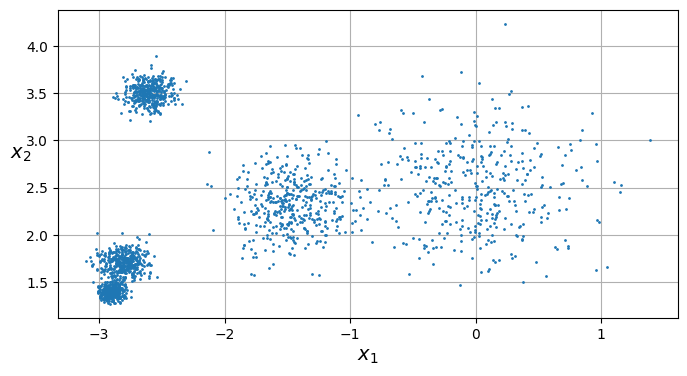

In [82]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

Centros de los clusters:
 [[ 0.0783778   2.16451394]
 [-2.85127128  1.55334118]
 [-2.60140129  3.49914817]
 [-0.0207084   2.89114195]
 [-1.44785999  2.31813847]]


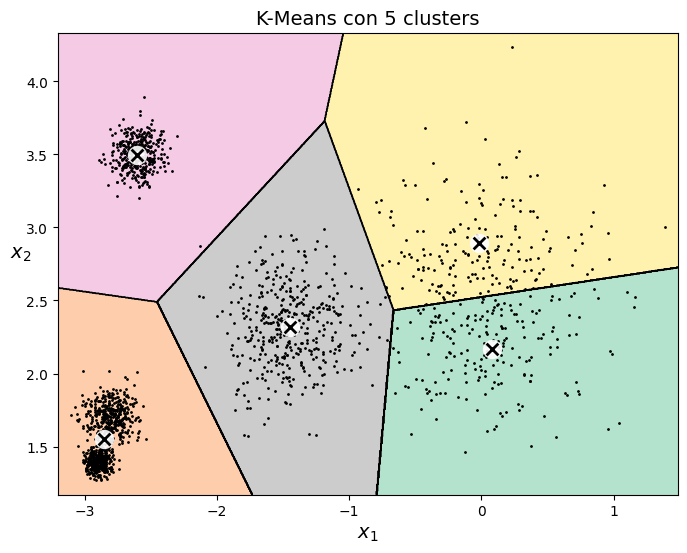

In [83]:
# Apartado 1
k = 5
# 5 clusters como nos indica el enunciado

kmeans = KMeans(n_clusters=k, n_init=1, random_state=42)
# n_init = 1 como nos indica el enunciado
kmeans.fit(X)
# Ajustar el modelo a los datos

print("Centros de los clusters:\n", kmeans.cluster_centers_)
# Imprimir las coordenadas de los centroides de los 5 clusters



#Apartado 2
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

# Mostramos la información del modelo ajustado a los datos
plt.figure(figsize=(8, 6))
plot_decision_boundaries(kmeans, X)
plt.title("K-Means con 5 clusters")
plt.show()

En el aparado 1, le indicamos que queremos usar 5 clusters, lo que significa que el algoritmo K-Means dividirá los datos en 5 grupos distintos. Como n_init=1, le decimos al algoritmo que se ejecute sólo una vez. La semilla aleatoria la ponemos en 42, número que se usa muy a menudo. Ajustamos el modelo K-Means que hemos configurado, a los datos X. Aquí se inicializan 5 centroides, se asigna cada punto dentro de los datos al centroide más cercano y se recalculan los centroides basados en los puntos asignados. Esto se repite hasta que el cambio de los centroides sea despreciable.

En el apartado 2, se usa la función plot_data, que toma los datos y los representa en un gráfico como puntos negros, para mostrar la distribución de los datos en un plano. La función plot_centroids pinta los centroides que calculamos en el apartado 1. Estos se muestran como círculos de color blanco con una x negra dentro. La función plot_decision_boundaries pinta las fronteras de decisión de los clusters creados por el modelo. Calcula los mínimos y máximos de las coordenadas X e Y para establecer los límites del gráfico. Con meshgrid de numpy creamos una cuadrícula de puntos (ya usado en la P1). Para cada punto de la cuadrícula, predecimos el cluster y adaptamos los resultados a la cuadrícula. Con contourf creamos el gráfico rellenado, y por último, configuramos las etiquetas. Lo único que he añadido ha sido código para visualizar la información. Le he dado tamaño a la figura (de la misma manera que en la P1). Utilizo la función plot_decision_boundaries, pasándole el modelo y los datos para visualizarlo.

In [84]:
#Apartado 3
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

# Clustering duro (predict)
hard_predictions = kmeans.predict(X_new)
print("Clustering duro (predict):", hard_predictions)

# Clustering flexible (transform)
flexible_predictions = kmeans.transform(X_new)
print("Clustering flexible (transform):\n", flexible_predictions)

Clustering duro (predict): [0 0 2 1]
Clustering flexible (transform):
 [[0.18223039 2.88604435 3.00245465 0.89138253 1.48240029]
 [2.92625035 5.86829444 5.79854651 3.14941474 4.45922309]
 [3.18974087 1.45428401 0.63877213 2.98127968 1.69530934]
 [3.09660472 0.95827092 1.07572208 3.00485781 1.56275789]]


En el apartado 3, tenenmos que usar el modelo K-Means que ya habíamos entrenado, para predecir a qué clusters pertenecen 4 nuevos datos específicos. En el clustering duro, el modelo toma los nuevos datos y predice el clúster más cercano, asignando a cada instancia un único clúster. En hard_predictions es donde se van a guardar los índices de los clústers a los que se asignan estas nuevas instancias. En el caso del clustering flexible, se calcula la distancia de cada nueva instancia a los centroides de los 5 clústers. Con el método transform se crea una matriz que indica a qué distancia está cada instancia de cada clúster, y se guarda en flexible_predictions.

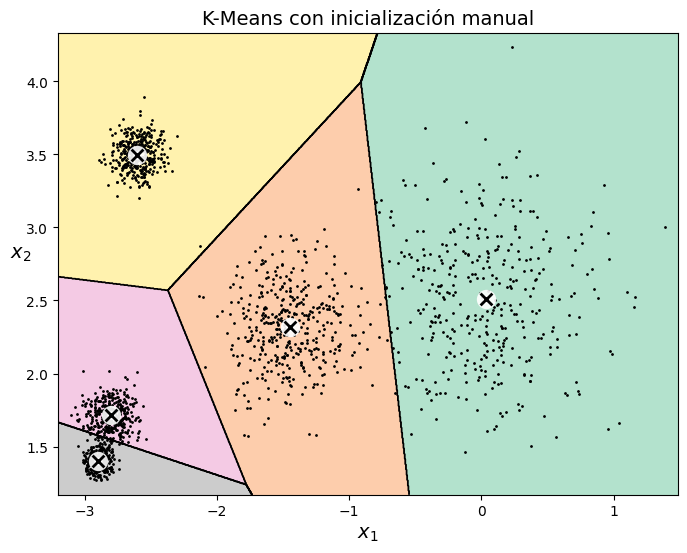

Centros de los clusters:
 [[ 0.03164412  2.51001507]
 [-1.44829505  2.31877364]
 [-2.80242208  1.71599211]
 [-2.60140129  3.49914817]
 [-2.89613756  1.40395196]]


In [85]:
#Apartado 4
# Asignamos valores manualmente
good_init = np.array([[0, 2.5], [-1.5, 2.3], [-2.8, 1.7], [-2.6, 3.5], [-2.9, 1.4]])
# Creamos modelo y lo ajustamos a los datos
kmeans_good_init = KMeans(n_clusters=k, init=good_init, n_init=1, random_state=42)
kmeans_good_init.fit(X)

# Mostramos la figura
plt.figure(figsize=(8, 6))
plot_decision_boundaries(kmeans_good_init, X)
plt.title("K-Means con inicialización manual")
plt.show()

# Mostramos los centros finales
print("Centros de los clusters:\n", kmeans_good_init.cluster_centers_)

En el apartado 4, queremos ver cómo afecta la inicialización manual de los clústers al resultado del algoritmo K-Means. En good_init guardamos los puntos que hemos escogido. Creamos un modelo de K_Means con 5 clústers (como nos dice el enunciado), con los centroides en los puntos escogidos y con n_init=1 (también dicho en el enunciado). Ajustamos el modelo a los datos y lo mostramos con la misma función de antes: plot_decision_boundaries. Mostramos también las coodenadas de los centroides que, como vemos, son aproximadamente las que le hemos indicado manualmente. Esto último ocurre para los valores que finalmente he dejado, pero también probé estos: np.array([[1, 2], [-2, 3], [-3, 1.5], [-1, 1], [0, 3]]), y los datos finales no se acercaban tanto a los originales. Esto puede pasar por varias razones, entre ellas, cuando más cerca estén los puntos iniciales de los centros de los clusters, los centroides finales estarán más cerca de estos puntos iniciales. Si están mñas lejos, el algoritmo los ajusta, pero puede haber más diferencia.  

In [86]:
# Apartado 5
k = 5  # Número de clusters
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(X)

# Mostramos la inercia y el score
print("Inercia para k=5:", kmeans.inertia_)
print("Valor de score():", kmeans.score(X))


Inercia para k=5: 182.413835600808
Valor de score(): -182.41383560080806


En el apartado 5, vemos cómo se usa la incercia para medir el rendimiento de nuestro modelo, que se ejecutará 10 veces con diferentes inicializaciones para luego quedarse con la mejor solución, que será la que tenga la inercia más baja (esto supone que los clústers son más compactos y distintos entre sí, que es lo que queremos conseguir). El método score() se utiliza porque, normalmente, un valor de métrica más alto, indica un mejor modelo. Por ello, cuanto menor sea la inercia, menos negativa será el score y por tanto, mayor.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprec

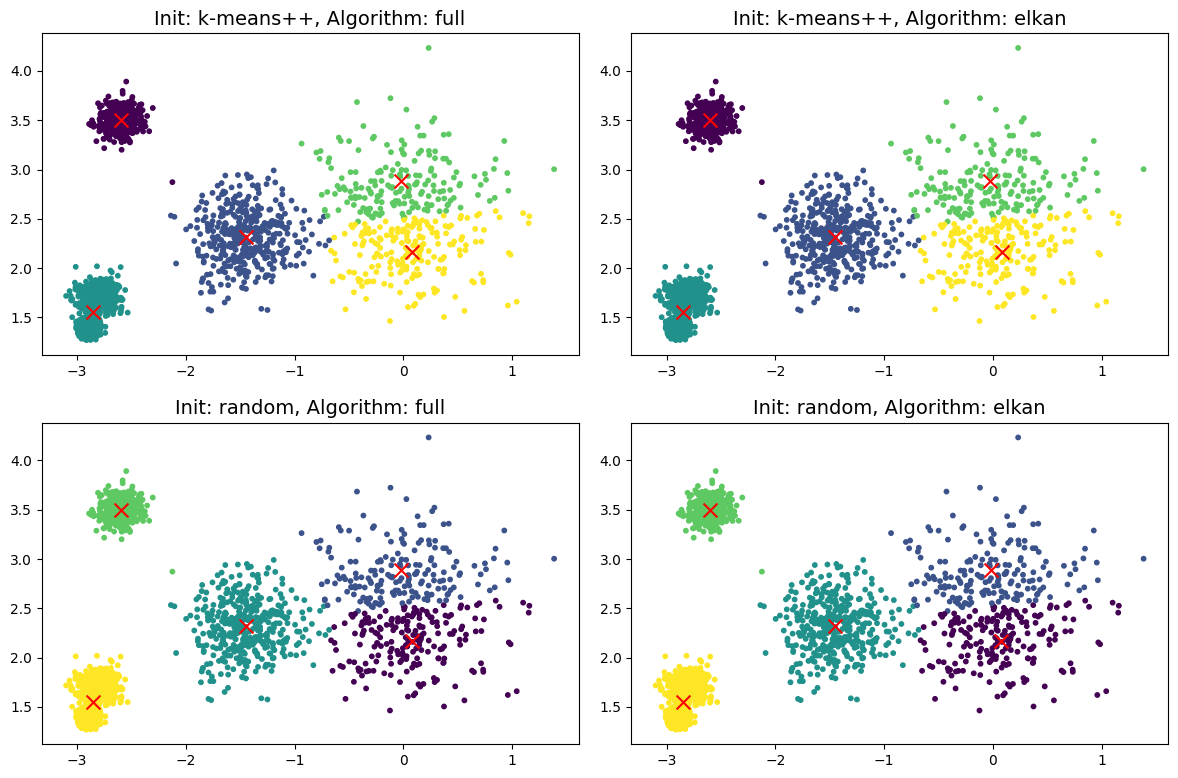

In [87]:
#Apartado 6
# Creamos los distintos métodos y algoritmos que vamos a utilizar
methods = ['k-means++', 'random']
algorithms = ['full', 'elkan']

# Mostramos una figura para cada combianción de método-algoritmo
fig, axes = plt.subplots(len(methods), len(algorithms), figsize=(12, 8))

# Para cada combinación
for i, init_method in enumerate(methods):
    for j, algorithm in enumerate(algorithms):
        # Creamos y ajustamos el modelo de KMeans al algoritmo y método de inicialización correspondiente
        kmeans = KMeans(n_clusters=5, init=init_method, algorithm=algorithm, random_state=42)
        kmeans.fit(X)

        # Visualizamos los resultados
        axes[i, j].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=10)
        axes[i, j].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', s=100)
        axes[i, j].set_title(f'Init: {init_method}, Algorithm: {algorithm}')

plt.tight_layout()
plt.show()


En el apartado 6 probamos diferentes métodos de inicialización y diferentes algortimos para el modelo KMeans.
- El primer método de inicialización es k-means++: se selecciona el primer centroide de forma aleatoria y luego se escogen los demás usando una probabilidad proporcional a la distancia cuadrada entre el punto y el centroide más cercano ya seleccionado. Tiene mejor convergencia que "random".
- El segundo método es random: los centroides se eligen de forma aleatoria, como bien indica el nombre, entre los puntos de datos existentes. Este método es más rápido que k-means++ pero tiene una peor convergencia y los resultados no son óptimos.
- El primer algoritmo es full: calcula las distancias euclídeas entre todos los puntos de los datos y todos los centroides en cada iteración. Como hay que hacer muchos cálculos, funciona bien en conjuntos de pocos datos.
- El segundo algoritmo es elkan: usa una desigualdad triangular, para no tener que calcular todas las distancias euclídeas. Esto supone menos tiempo de ejecución, lo que viene bien para conjuntos de muchos datos.

Vemos los resultados con scatter (que crea un gráfico de dispersión), indicándole la paleta de colores que queremos utilizar, y el tamaño de los puntos. Analizándo estos gráficos, vemos que son muy parecidos a simple vista. Esto puede ser porque los datos son simples y no muy sensibles a los cambios en los parámetros que estamos observando.

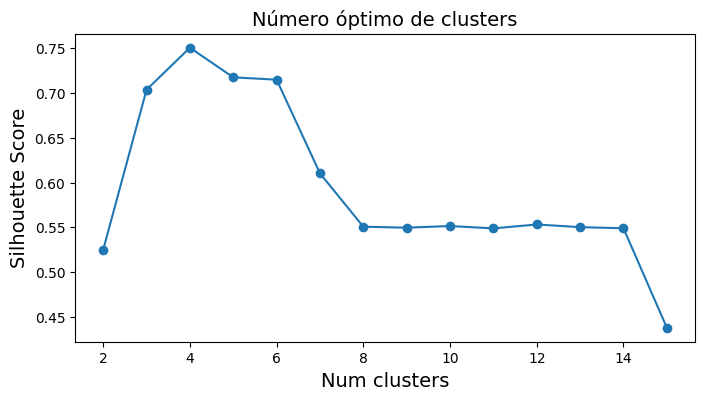

In [88]:
#Apartado 7
# Importamos silhouette_score
from sklearn.metrics import silhouette_score

# Números de clústers a probar, de 2 a 15
k_range = range(2, 16)
silhouette_scores = []

# Para cada número de clusters, ajustamos el modelo y calculamos el silhouette_score
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score) # Lo añadimos al array donde se encuentran todos

# Visualizamos los resultados
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Num clusters")
plt.ylabel("Silhouette Score")
plt.title("Número óptimo de clusters")
plt.show()


En el apartado 7, nos piden usar la métrica de silhouette_score para encontrar el número óptimo de clústers. El silhouette_score mide cómo de bien situada está un dato dentro de un cluster comparado con otros clusters. Para ello usa una fórmula con la distancia intra-cluster e inter-clusters. Lo que hacemos es calcular este valor usando de 2 a 15 clústers, y ver para qué número es más alto el valor de la métrica. Uso un array para guardar todos los valores calculados de la métrica. Para cada valor del número de clústers, creamos un modelo K-Means con ese número de clústers y con n_init=10 (como dice el enunciado). Ajustamos el modelo a los datos y le calculamos el silhouette_score, añadiendolo al array antes mencionado.

Análisis de resultados: sabemos que el valor de silhouette_score puede variar de -1 a 1. Cuanto más cerca a 1, mejor definidos están los clusters, mientras que cuanto más cercano a -1, peor. En nuestro gráfico vemos que se obtiene silhouette_score más alto para 4 clusters, siendo este valor para el que los clusters están mejor definidos y más separados entre sí.
Los valores cercanos a 4 tienen un silhouette_score similar, indicando que también son buenos valores para el número de clusters. Cuanto más nos alejamos del 4 (sobretodo al alza), peor es el valor de la métrica.

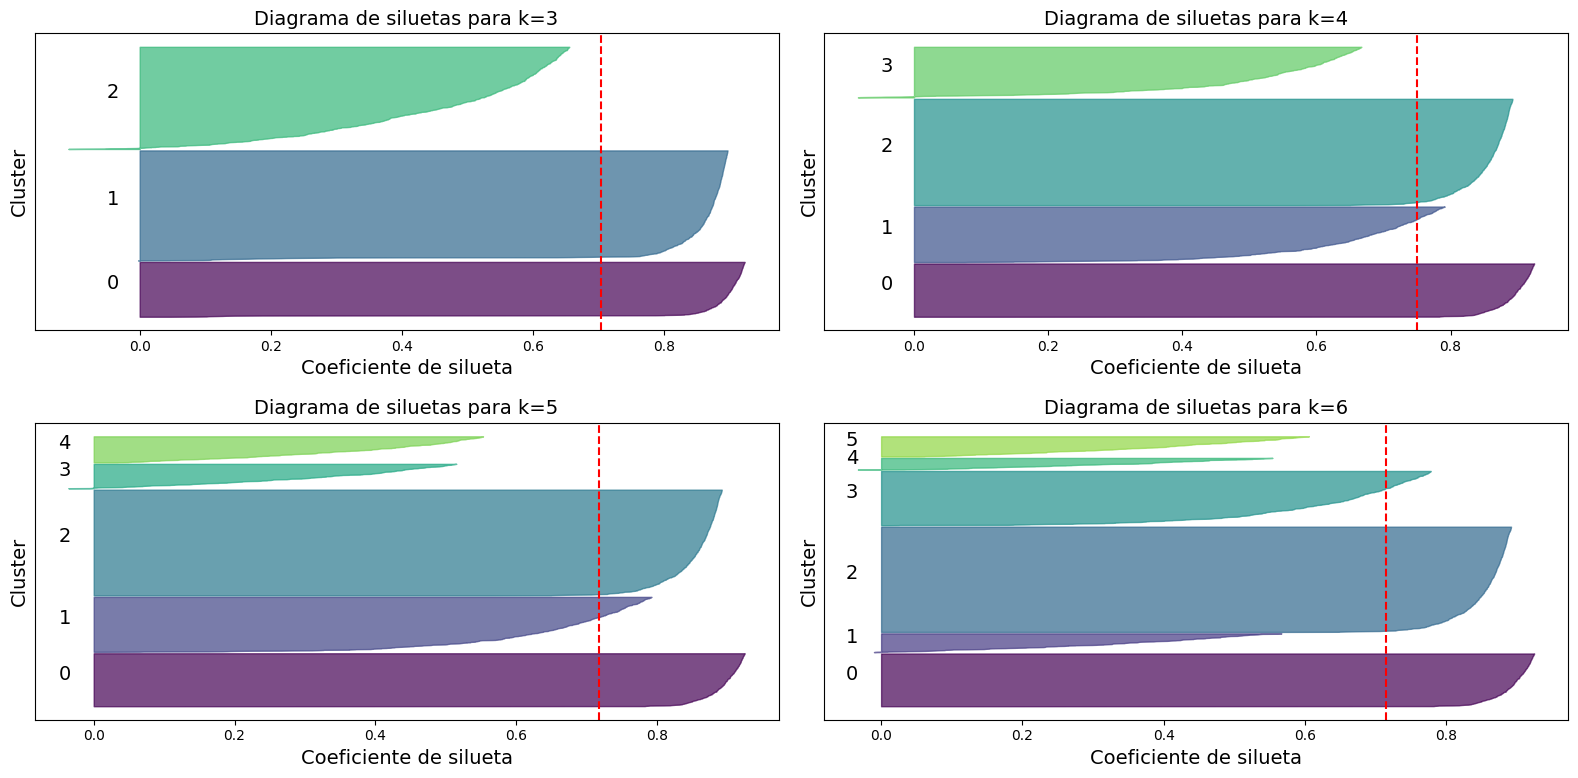

In [89]:
#Apartado 8

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

#Creamos una función
def plot_silhouette_diagrams(X, k_values):
    plt.figure(figsize=(16, 8))

    #Para cada valor de clusters
    for i, k in enumerate(k_values, start=1):
        plt.subplot(2, 2, i)

        # Creamos un objeto modelo con el número actual de clusters
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(X)

        # Calculamos el coeficiente de silueta
        silhouette_vals = silhouette_samples(X, kmeans.labels_)
        silhouette_avg = silhouette_score(X, kmeans.labels_)

        y_lower = 10
        for j in range(k):
            # Agregamos el coeficiente de silueta
            jth_silhouette_vals = silhouette_vals[kmeans.labels_ == j]
            jth_silhouette_vals.sort()
            size_cluster_j = jth_silhouette_vals.shape[0]
            y_upper = y_lower + size_cluster_j

            # Rellenamos el gráfico
            color = plt.cm.viridis(float(j) / k)
            plt.fill_betweenx(np.arange(y_lower, y_upper), 0, jth_silhouette_vals,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Ponemos las etiquetas
            plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
            y_lower = y_upper + 10

        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
        plt.title(f"Diagrama de siluetas para k={k}")
        plt.xlabel("Coeficiente de silueta")
        plt.ylabel("Cluster")
        plt.yticks([])

    plt.tight_layout()
    plt.show()

# Visualizamos diagramas de silueta para k={3,4,5,6}
plot_silhouette_diagrams(X, [3, 4, 5, 6])

En este apartado, nos piden dibujar los coeficientes de silueta para varios números de clusters. Lo primero que hago es crear una función plot_silhouette_diagrams, igual que se hacía en los primeros apartados. Esta función va a crear una figura que contenga los gráficos de silueta para cada valor de clusters. Para cada valor, creamos un modelo K-Means y lo ajustamos a los datos. Calculamos los coeficientes de silueta usando la librería que hemos importado. Ordenamos los valores de coeficientes de silueta que hemos obtenido. Dibujamos los resultados.

Análisis de resultados: La línea roja vertical que dibujamos es para representar el promedio del coeficiente de silueta. Cuanto más alta sea la forma para un k determinado, más instancias hay en dicho cluster. Cuanto más ancha sea la forma, mayores son los coeficientes de silueta de las instancias en dicho cluster, lo cual indica una buena cohesión. En los cuatro casos, vemos que el valor más ancho es el cluster 0, por lo tanto es el que tiene mejor cohesión. Cuanto más aumentamos k, peores son los coeficientes de silueta de los clusters más altos, y del cluster 1. Esto puede ser porque los datos no están cerca del centro del cluster. Además, la poca altura de estas figuras indica que hay pocas instancias dentro de dicho cluster, por lo que puede ser pequeño. De esto podemos deducir que k=5 y k=6 son demasiados clusters para nuestro conjuntos de datos.

Número óptimo de clusters según Silhouette Score: 38


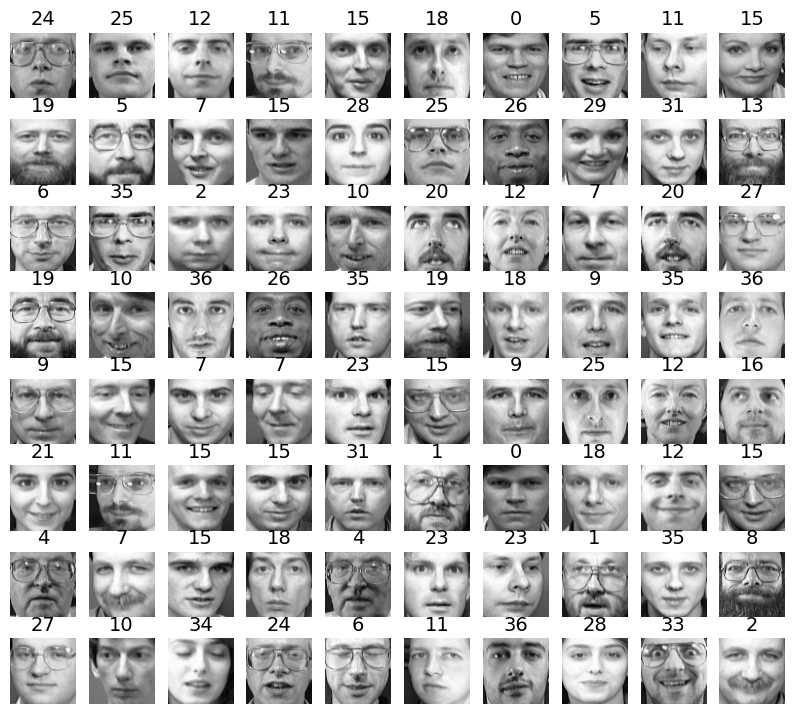

<Figure size 640x480 with 0 Axes>

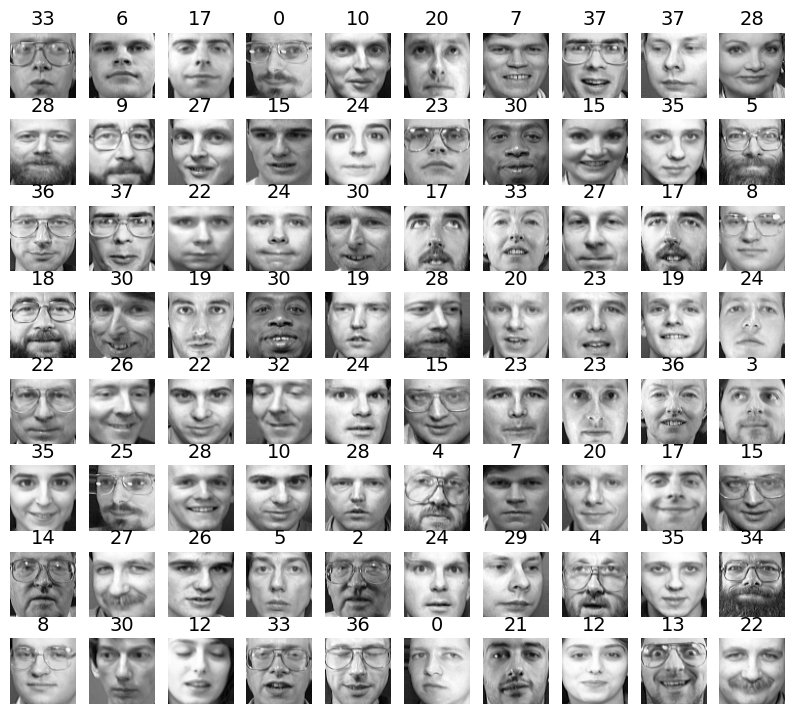

<Figure size 640x480 with 0 Axes>

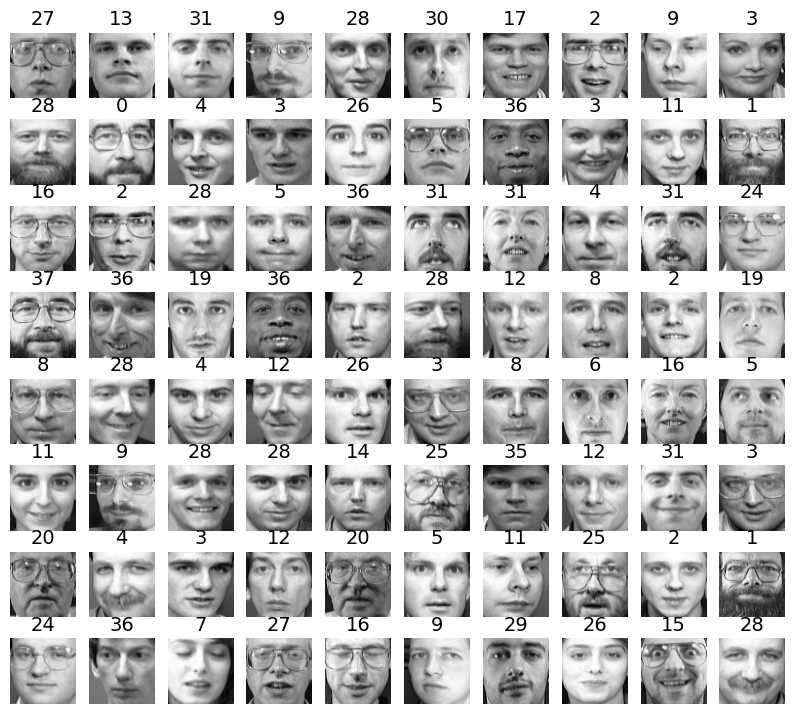

<Figure size 640x480 with 0 Axes>

In [90]:
#Apartado 9

from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

# Para dividir los datos en proporción correcta
from sklearn.model_selection import StratifiedShuffleSplit

X = olivetti.data
y = olivetti.target

from sklearn.preprocessing import StandardScaler

# Dividimos el conjunto de datos en entrenamiento y prueba
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Número de clusters a probar, de 32 a 41
k_range = range(32, 42)
silhouette_scores = []

# Para cada número de clusters, ajustar el modelo y calcular el Silhouette Score
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_scores.append(score)

# Encontramos el número óptimo de clusters basado en el Silhouette Score
optimal_num_clusters = k_range[silhouette_scores.index(max(silhouette_scores))]
print("Número óptimo de clusters según Silhouette Score:", optimal_num_clusters)

n_clusters=optimal_num_clusters

# K-Means con inicialización k-means++ y n_init=10
kmeans_plus = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)
kmeans_plus.fit(X_train)

# K-Means con inicialización random y n_init=1
kmeans_random_1 = KMeans(n_clusters=n_clusters, init='random', n_init=1, random_state=42)
kmeans_random_1.fit(X_train)

# K-Means con inicialización random, n_init=10 y algoritmo elkan
kmeans_random_10_elkan = KMeans(n_clusters=n_clusters, init='random', n_init=10, algorithm='elkan', random_state=42)
kmeans_random_10_elkan.fit(X_train)

def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

# Para visualizar las caras agrupadas por clusters
def plot_clustered_faces(kmeans_model, X_data, title):
    cluster_labels = kmeans_model.predict(X_data)

    plot_faces(X_data, cluster_labels, n_cols=10)
    plt.suptitle(title)
    plt.show()

plot_clustered_faces(kmeans_plus, X_test, "K-Means clustering (k-means++)")
plot_clustered_faces(kmeans_random_1, X_test, "K-Means clustering (random, n_init=1)")
plot_clustered_faces(kmeans_random_10_elkan, X_test, "K-Means clustering (random, n_init=10, elkan)")

He decidido utilizar 38 clusters, pues he hecho una comparación usando el silhouette score para ver en qué caso era mejor (entre 32 y 42, pues tampoco quería tener más clusters que personas ni muy pocos clusters que se agrupase a gente muy diferente), al igual que en el apartaod 7.

¿Ves caras similares en cada cluster? En general sí, aunque es cierto que a veces hay caras que yo hubiese agrupado de formas diferentes pues les veo más parecido con caras de otros clusters que del suyo propio. Diría que veo los mejores resultados en el último caso (kmeans con elkan), pues no se dan tantos casos de agrupaciones de gente con gafas y sin gafas en un mismo cluster por ejemplo.

### <font color='blue'>Ejercicio 1.B: Utilización de DBSCAN (1 punto)</font>

<font color='blue'> En este ejercicio haremos algo similar a lo realizado en el anterior, pero ahora con otro problema sintético en 2D y el algoritmo DBSCAN. Para crear el conjunto sintético haremos uso de la función `make_moons` dentro del paquete de `sklearn.datasets`. Crearemos un conjunto sintético de $1.000$ puntos con una tasa de ruido de $0.05$.


<font color='blue'> Las tareas a realizar a realizar en este ejercicio se resumen a continuación:
1. A partir del conjunto de datos especificado, ajusta un algoritmo DBSCAN con los hiperparámetros por defecto (5 mínimas muestras por cluster). Identifica los índices de los ejemplos núcleo (_core points_)) e imprime sus coordenadas. Para ello, emplea las variables de instancia `core_sample_indices_` y `components_`, respectivamente.
2. La variable de instancia `labels_` contiene el núcleo al que pertenece cada ejemplo
del conjunto de datos. Observa que algunas instancias tienen un índice de cluster
igual a -1, lo que significa que el algoritmo las considera anomalías. En un conjunto
sencillo como este, en un principio, no debería haber anomalías. El hiperparámetro `eps` indica la distancia
máxima entre dos muestras para que una se considere vecina de la otra (no se trata de un
límite máximo de las distancias de los puntos dentro de un cluster). Es el hiperparámetro
de DBSCAN más importante que debes elegir adecuadamente para tu conjunto de datos y
función de distancia. Ajusta 4 modelos de DBSCAN con el hiperparámetro $eps$ igual a
$\{0.01,0.02,0.05,0.1\}$. Dibuja una representación de los clústers para cada modelo
identificando las anomalías que tiene en el gráfico y dando el porcentaje de anomalías
de cada modelo. Analiza y explica los resultados obtenidos.
3. Sorprendentemente, la clase DBSCAN no tiene un método `predict()`,
aunque sí tiene un método `fit_predict()`. En otras palabras, no puede predecir
a qué cluster pertenece una nueva instancia. Esta decisión se tomó porque diferentes
algoritmos de clasificación pueden ser mejores para diferentes tareas, por lo que los
autores decidieron dejar que el usuario eligiera cuál utilizar. Pero sí se puede usar
un clasificador para ver en qué cluster está cada punto nuevo. Hazlo con un clasificador
kNN con un vecindario de 30 vecinos, usando el mejor modelo del apartado anterior y utilizando como
ejemplos de entrenamiento los _core points_ encontrados y como etiquetas (salidas deseadas) las `labels_` obtenidas. Obtén el cluster asociado y la probabilidad para los
siguientes 4 ejemplos `[[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]]`.
Junto con lo anterior, dibuja un gráfico que represente los bordes de decisión y aplica también k-means sobre los mismo datos. Analiza las diferencias entre dichas fronteras de decisión en base al funcionamiento y naturaleza de los dos algoritmos subyacentes.
    
<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas.



---



Índices de los ejemplos núcleo:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 23

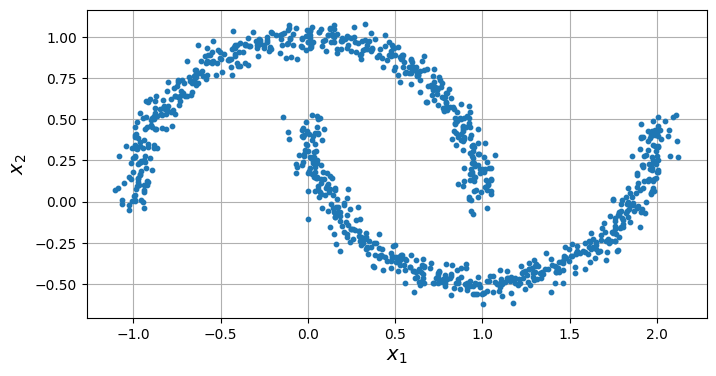

In [91]:
#Apartado 1
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Modelo DBSCAN con parámetros por defecto
dbscan = DBSCAN()
dbscan.fit(X)

# Obtenemos los índices
core_sample_indices = dbscan.core_sample_indices_
core_samples = dbscan.components_

# Mostramos las coordenadas
print("Índices de los ejemplos núcleo:")
print(core_sample_indices)
print("\nCoordenadas de los ejemplos núcleo:")
print(core_samples)

# Para visualizar los clusters
def plot_clusters(X, y=None):
    if y is None:
        plt.scatter(X[:, 0], X[:, 1], s=10)
    else:
        plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='viridis')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

Para este apartado, usamos el modelo DBSCAN, con los parámetros por defecto, como nos lo indican en el enunciado. Con core_sample_indices obtenemos los índices de los puntos núcleo, y con components las coordenadas de dichos puntos. Defino una función plot_clusters para ver los clusters que se han formado por el modelo, mostrandose de distinto color según el cluster al que pertenecen, de acuerdo a un grupo de colores.

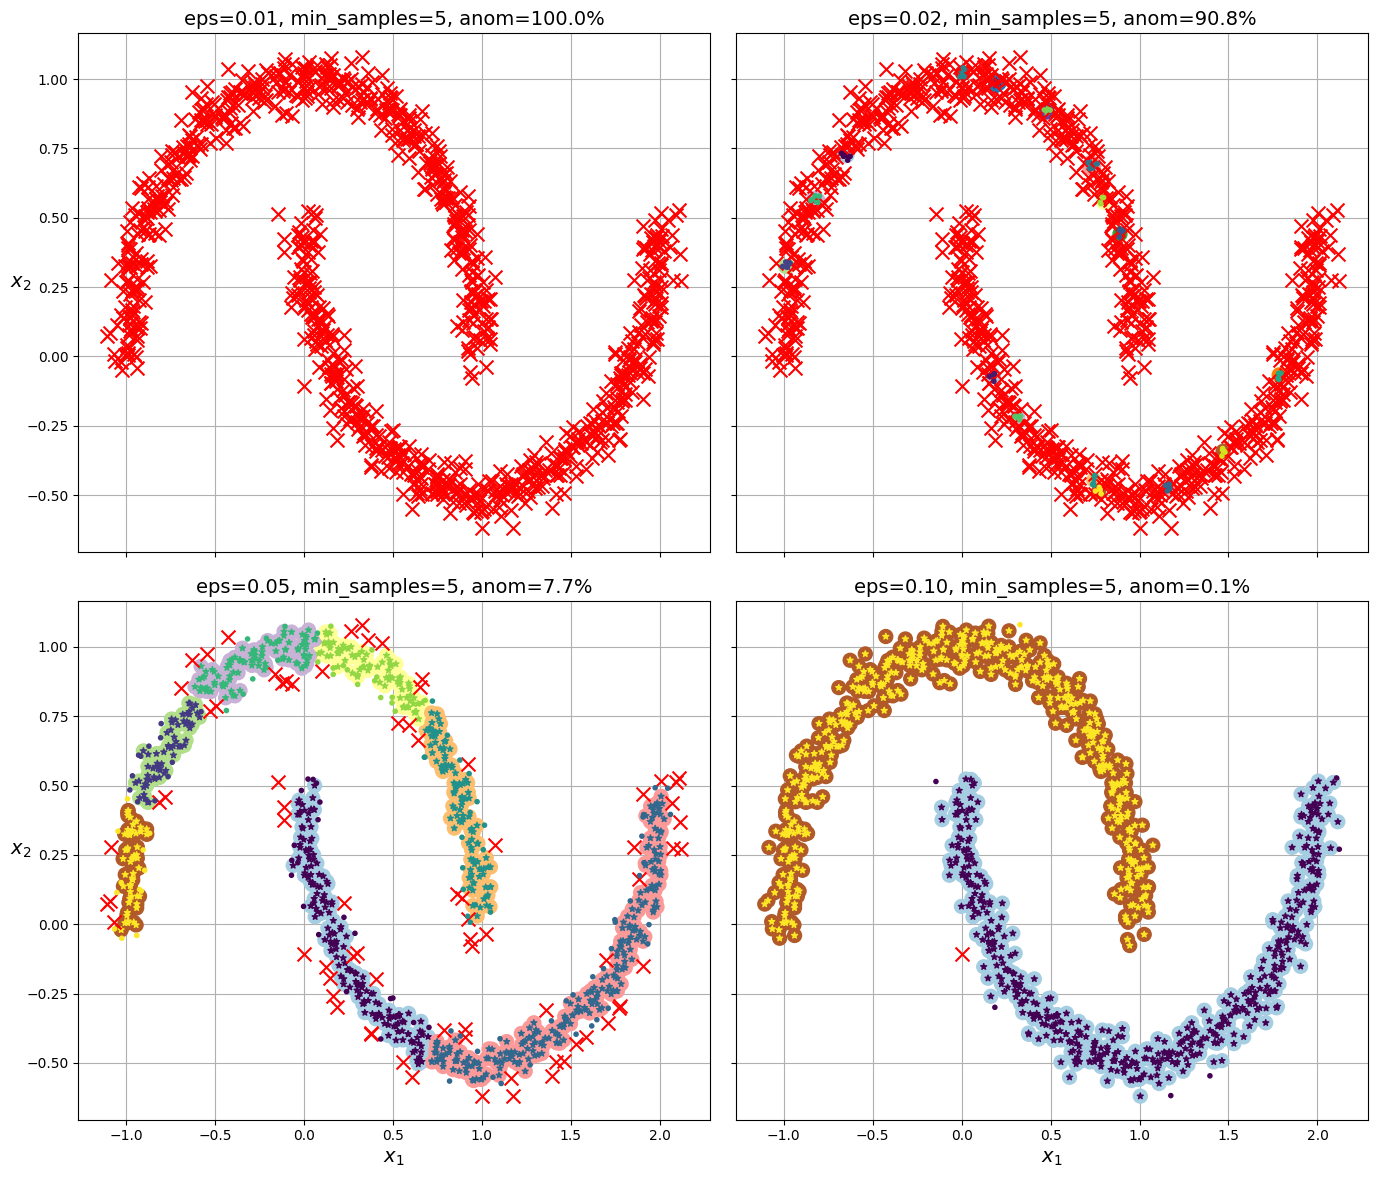

In [92]:
#Apartado 2
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True, anom_rate = 0):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}, anom={anom_rate}%")
    plt.grid()
    plt.gca().set_axisbelow(True)

eps_values = [0.01, 0.02, 0.05, 0.1]

# Ajustamos los modelos DBSCAN y vemos los resultados
plt.figure(figsize=(14, 12))
for i, eps in enumerate(eps_values, 1):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(X)

    # Calculamos el porcentaje de anomalías
    anomalies_ratio = np.sum(dbscan.labels_ == -1) / len(dbscan.labels_) * 100

    # Visualizamos los resultados
    plt.subplot(2, 2, i)
    plot_dbscan(dbscan, X, size=100, show_xlabels=(i > 2), show_ylabels=(i % 2 == 1), anom_rate=anomalies_ratio)

plt.tight_layout()
plt.show()


Para este apartado, usamos los datos que generamos en el apartado 1 de este mismo ejercicio. La función plot_dbscan que nos dan sirve para visualizar los resultados de ajustar el modelo a los datos, utilizando diferentes colores para diferenciar puntos núcleo, puntos no núcleo y anomalías. Ajustamos cuatro modelos DBSCAN a nuestros datos, cada uno con un valor de eps de los que nos indica el enunciado, para lo cual utilizo un bucle. Calculo el porcentaje de anomalías para cada modelo, dividiendo el número de labels que son igual a -1 (y por tanto anomalías) entre el número de labels totales.

Análisis de resultados:
- EPS=0.01: Todo son anomalías. Esto se debe a que el valor de EPS es demasiado pequeño, es decir, la distancia máxima entre dos muestras para que esten en el mismo cluster es muy pequeña, y por tanto nunca se da esta situación.
- EPS=0.02: Hay un 90% de anomalías. En comparación con el caso anterior, hay menos anomalías porque hemos aumentado la distancia máxima de la que hablabamos, pero sigue siendo demasiado pequeña.
- EPS=0.05: Hay un 7.7% de anomalías. Este valor es más razonable y ya se forman clusters.
- EPS=0.1: Hay un 0.1% de anomalías, lo que nos dice que la mayoría de los puntos forman parte de algún cluster, pues hemos aumentado considerablemente la distancia mínima. Lo único malo de aumentar este valor demasiado es que nos puede agrupar en un mismo cluster puntos dispares, por lo que hay que controlarlo.

Predicted Clusters: [1 0 1 0]
Predicted Probabilities: [[0.1 0.9]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


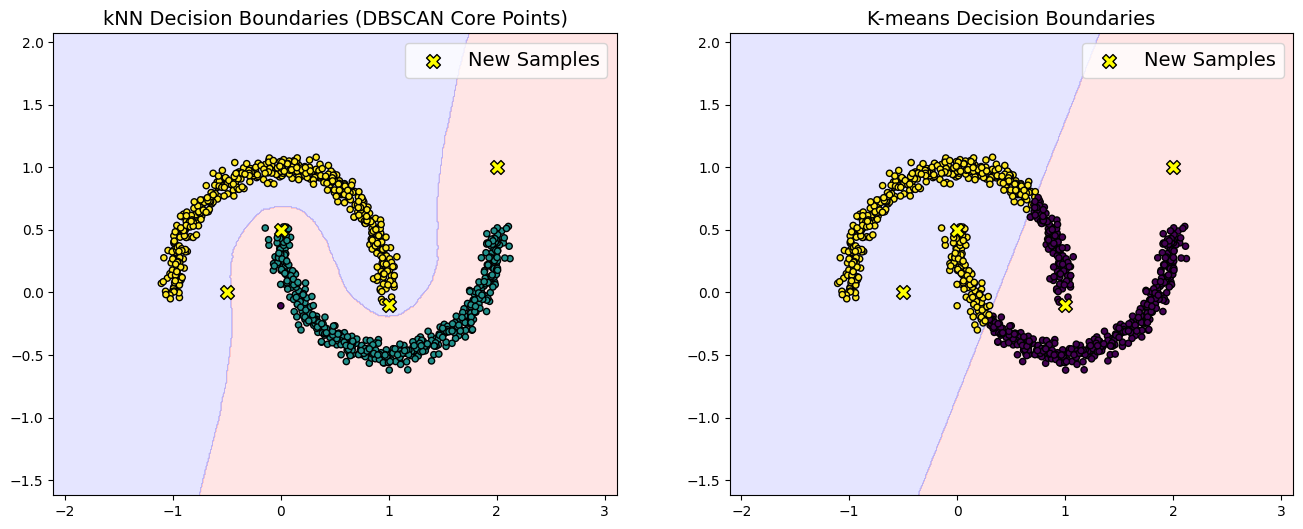

In [93]:
#Apartado 3
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Ajustamos el modelo y obtenemos los puntos núcleo y etiquetas
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(X)
core_sample_indices = dbscan.core_sample_indices_
components = dbscan.components_
labels=[]
for i in core_sample_indices:
  labels.append(dbscan.labels_[i])

# Modelo kNN con 30 vecinos
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(components, labels)

# Nuevos puntos a predecir (enunciado)
new_points = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
predictions = knn.predict(new_points)
probabilities = knn.predict_proba(new_points)

print("Predicted Clusters:", predictions)
print("Predicted Probabilities:", probabilities)

# Modelo K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Para visualizar los bordes de decisión
def plot_decision_boundaries(X, y, model, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap='viridis')
    ax.scatter(new_points[:, 0], new_points[:, 1], c='yellow', edgecolor='k', s=100, marker='X', label='New Samples')
    ax.set_title(title)
    ax.legend()

# Visualizar bordes de decisión
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_decision_boundaries(X, dbscan.labels_, knn, ax[0], "kNN Decision Boundaries (DBSCAN Core Points)")
plot_decision_boundaries(X, kmeans.labels_, kmeans, ax[1], "K-means Decision Boundaries")
plt.show()

En este apartado, ajustamos a los datos un modelo DBSCAN con el valor de eps a 0.1, basándonos en los resultados del apartado anterior, pues es el que menor porcentaje de anaomalías presentaba. Luego obtengo los puntos núcleo y sus etiquetas y los uso para entrenar el clasificador KNN con 30 vecinos. Para los nuevos puntos del enunciado, predigo los clusters y sus probabilidades. Por último, visualizo las fronteras de decisión para los dos modelos que he utilizado.

Análisis de resultados: como vemos, DBSCAN se adapta más fácilmente a cualquier forma, pero como k-Means se basa en la distancia euclídea, sus fronteras son lineales y por tanto no se adaptan tan bien a este problema.

## <font color='blue'>Ejercicio 2: PROBLEMA DE AGRUPAMIENTO (5 puntos)</font>

<font color='blue'> Para la realización de este ejercicio, se ha seleccionado el dataset denominado "Anuran Calls (MFCCs)" [1] (https://archive.ics.uci.edu/dataset/406/anuran+calls+mfccs). Este conjunto de datos describe las características sonoras de los cantos de diferentes especies de anfibios del orden Anura, cuyos integrantes coloquialmente son conocidos como ranas o sapos.

<font color='blue'> Se encuentran representados por medio de los coeficientes cepstrales en las frecuencias de Mel ([_Mel-frequency cepstral coefficients_](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum), MFCCs), que son en esencia, una representación abstracta de una señal de audio obtenida al aplicar una transformada del coseno discreta a un espectrograma de Mel, es decir, una representación  de las frecuencias auditivas que son capaces de captar los humanos. Debido a ser una representación compacta del [espectrograma](https://en.wikipedia.org/wiki/Spectrogram), manteniendo las características más importantes del audio, se utiliza de forma regular en procesado del habla y aplicaciones de aprendizaje automático en procesado de señales de audio [2].

<font color='blue'> El dataset, creado por investigadores de la Universidad Federal del Amazonas en Brasil, contiene individuos de 10 especies, también incluyéndose su género y familia taxonómica, con el objetivo original de lograr realizar una clasificación multiclase de las especies de anuros que fueron grabados en los terrenos de la Universidad, así como de Mata atlántica (Brasil) y Córdoba (Argentina) en condiciones reales, es decir, con ruido de fondo.
    
<font color='blue'> Este conjunto de datos se utilizó en varias tareas de clasificación relacionadas con el reto del reconocimiento de especies de anuros a través de sus llamadas. Se trata de un conjunto de datos multietiqueta con tres columnas de etiquetas. Este conjunto de datos se creó segmentando 60 registros de audio pertenecientes a 4 familias diferentes, 8 géneros y 10 especies. Cada audio corresponde a un espécimen (una rana individual), el ID del registro también se incluye como columna adicional. Se utilizaron la entropía espectral y un método de cluster binario para detectar los fragmentos de audio pertenecientes a cada sonido. La segmentación y la extracción de características se realizaron en Matlab. Tras la segmentación se obtuvieron 7195 sílabas, que se convirtieron en instancias para entrenar y probar el clasificador.

<font color='blue'> Resulta entonces interesante saber si las clasificaciones taxonómicas realizadas tienen sentido en cuanto a los datos, es decir, ¿realmente se corresponden de cierta forma los distintos cantos de los anuros con la clasificación que poseen actualmente? ¿O existen especies que, siendo de diferentes grupos taxonómicos, poseen un canto indistinguible?

### <font color='blue'> Objetivos
    
<font color='blue'> El objetivo del presente trabajo es analizar los patrones de los datos, sin tomar en cuenta su _ground truth_, para determinar si la clasificación taxonómica actual corresponde razonablemente con una diferencia en los cantos. Claro está que este estudio representará un análisis superficial del problema, pero al menos sí podrá servir de base para estudiar si podemos determinar una taxonomía aproximada de los anuros.

<font color='blue'> Para llevar a cabo este objetivo principal se llevarán a cabo los siguientes objetivos secundarios:
1. <font color='blue'> Realización de un análisis exploratorio de los datos para una primera observación de las distribuciones de los cantos.
2. Detección y eliminación de _outliers_ así como las transformaciones necesarias para que los datos sean lo más "correctos" para los métodos de _clustering_.
4. Experimentación y determinación de los algoritmos y métricas intrínsecas más acordes a los datos. El alumnado debe experimentar con, al menos, dos algoritmos diferentes de _clustering_.

### <font color='blue'> Hipótesis
<font color='blue'>Sobre los datos se pueden realizar las siguientes hipótesis:
- <font color='blue'>Los datos, siendo grabaciones que incluyen el ruido de fondo, poseerán una cantidad significativa de _outliers_.
- <font color='blue'>Será posible, al menos en parte, observar cierta "agrupación" en los datos a simple vista.
- <font color='blue'>Existirá cierta correlación entre los _MFCCs_ debido a que provienen de una misma grabación, por lo que ciertas columnas/características crecerán o disminuirán de forma conjunta. En otras palabras, como el dispositivo empleado para adquirir sonidos es el mismo para todas las pistas de audio (7195), es razonable pensar que si algún _MFCC_ presenta algún problema, o atenuación de algún tipo, dicha particularidad podrá estar presente en todas las instancias/observaciones.  

### <font color='blue'> Resultados Esperados
<font color='blue'> Se espera que los resultados que se obtengan del clustering sean razonablemente parecidos a la realidad. Es decir, se espera que el agrupamiento encontrado tenga algún tipo de relación con alguna de las últimas 4 columnas de los datos (_Family_, _Genus_, _Species_ o _RecordID_).

### <font color='blue'> Bibliografía

<font color='blue'><font color='blue'>[1] E. N. Juan Colonna, “Anuran Calls (MFCCs).” UCI Machine Learning Repository, 2015. doi: 10.24432/C5CC9H. https://archive.ics.uci.edu/dataset/406/anuran+calls+mfccs

<font color='blue'>[2] “3.8. The cepstrum, mel-cepstrum and mel-frequency cepstral coefficients (MFCCs) — Introduction to Speech Processing.” Accessed: Jan. 13, 2024. [Online]. Available: https://speechprocessingbook.aalto.fi/Representations/Melcepstrum.html#the-cepstrum




In [94]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta 'clasificacion' (que contiene optdigits.tes, optdigits.tra, optdigits.names)
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
dataFolder = 'drive/MyDrive/Colab Notebooks/clustering/'

In [96]:
import pandas as pd

df_frogs = pd.read_csv(dataFolder + "/dataset/Frogs_MFCCs.csv")
df_frogs

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


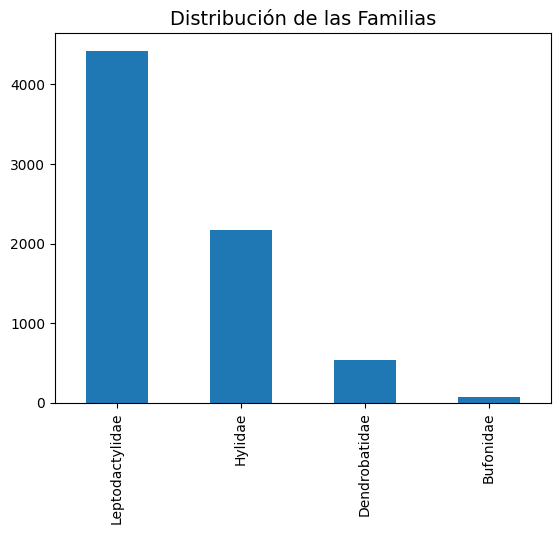

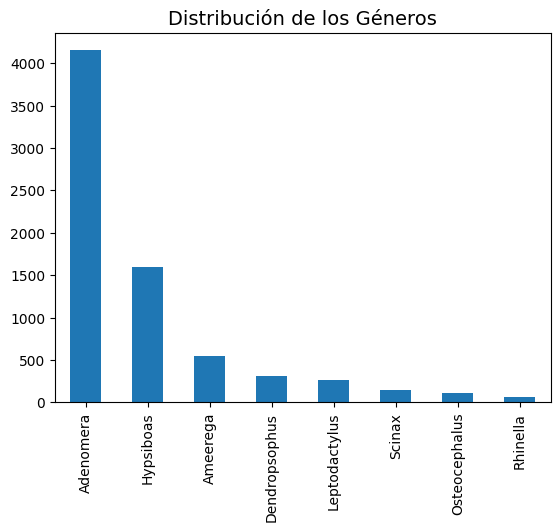

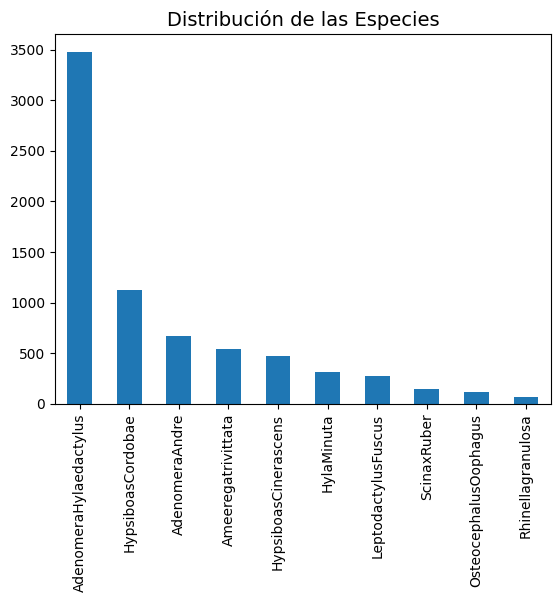

In [97]:
# Visualizamos la distribución de las clases
df_frogs['Family'].value_counts().plot(kind='bar')
plt.title('Distribución de las Familias')
plt.xlabel('')  # Eliminamos la etiqueta del eje x para que se vea todo más claro
plt.show()

df_frogs['Genus'].value_counts().plot(kind='bar')
plt.title('Distribución de los Géneros')
plt.xlabel('')
plt.show()

df_frogs['Species'].value_counts().plot(kind='bar')
plt.title('Distribución de las Especies')
plt.xlabel('')
plt.show()



Basándonos en los gráficos que muestran la información ordenada, podemos ver que en las familias predomina Leptodactylidae, con más del doble de instancias que la siguiente familia más popular. En cuanto a los géneros, predomina Adenomera, también con más del doble que el segundo. En las especies, predomina AdenomeraHylaedactylus, con alrededor del triple de la siguiente. Esto nos da una idea de cómo están distribuidos los datos.

In [98]:
# Detección y eliminación de outliers
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope

# Función para detectar outliers utilizando el rango intercuartílico (IQR)
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

outliers = detect_outliers_iqr(df_frogs.iloc[:, :-4])  # Identificar outliers
df_frogs_clean = df_frogs.loc[~outliers.any(axis=1)]  # Seleccionar instancias no outliers

# Transformaciones de datos
scaler = StandardScaler()  # Inicializar objeto para estandarización
df_frogs_scaled = scaler.fit_transform(df_frogs_clean.iloc[:, :-4])  # Estandarizar características

# Reducción de dimensionalidad
pca = PCA(n_components=10)  # Inicializar objeto PCA
df_frogs_pca = pca.fit_transform(df_frogs_scaled)  # Aplicar PCA para reducir dimensionalidad

Utilizo el método del rango intercuartílico para detectar outliers (ya mencionado en la P1). Se calculan los límites inferior y superior para cada columna del dataframe de entrada y comparamos cada valor del dataframe con estos extremos, para ver si lo consideramos outlier o no. Aplicamos esto a todas las columnas menos a las últimas 4, ya que contienen las etiquetas de clase. Con outliers.any obtenemos las filas que no tienen outliers en ninguna columna, En df_frogs_clean nos quedamos únicamente con las instancias que no tienen outliers. He decidido usar el método IQR ya que también probé el método de EllipticEnvelope, pero me daba peores valores de métricas.

Estandarizamos los datos como lo hacemos siempre para que todas las características esten en la isma escala y los algoritmos converjan más rápido.

Reducimos dimensionalidad con PCA, también para acelerar el proceso de clustering. He decidido incluir este paso ya que los resultados (los valores de las métricas), mejoraban ligeramente para K-Means reduciendo dimensionalidad, y no afectaban apenas al DBSCAN. También he probado con distintos valores de n_components, y he decidido quedarme con 10, que daba mejores resultados que otros que probé.

In [99]:
# Algoritmos

# Inicializamos los dos modelos
kmeans = KMeans(n_clusters=4, random_state=42)
dbscan = DBSCAN(eps=0.1, min_samples=5)

# Aplicamos clustering
kmeans_clusters = kmeans.fit_predict(df_frogs_pca)
dbscan_clusters = dbscan.fit_predict(df_frogs_scaled)

# Evaluamos resultados
silhouette_kmeans = silhouette_score(df_frogs_pca, kmeans_clusters)

silhouette_dbscan = silhouette_score(df_frogs_scaled, dbscan_clusters)

print("Resultados de K-Means:")
print("Silhouette Score:", silhouette_kmeans)

print("\nResultados de DBSCAN:")
print("Silhouette Score:", silhouette_dbscan)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Resultados de K-Means:
Silhouette Score: 0.30547735694379824

Resultados de DBSCAN:
Silhouette Score: 0.028291939191592983


He usado la misma métrica que en los ejercicios anteriores para medir cómo de bien funcionan nuestros modelos, viendo cuanta cohesión hay en un cluster en comparación con otros.

Análisis de resultados: En el caso de K-Means, el silhouette score es 0.3 aproximadamente, lo que nos dice que los clusters estan relativamente bien definidos, y los datos de las muestras más o menos cerca de sus centroides. En el caso de DBSCAN, inicialmente usé eps=0.5, con ,lo que obtuve un valor negativo, lo que puede mostrar que las muestras han sido asignadas de manera errónea a los clusters. Este valor puede significar que hay valores dentro de las muestras que están dentro de un cluster que no es el más cercano a ellas, con lo que la asignación no está siendo eficiente ni correcta. Decidí probar con eps=0.1, con lo que obtuve un valor de silhouette score = 0.03 aproximadamente, con lo que obtengo una asignación correcta aunque no muy eficiente.
Así concluimos que K-Means ha funcionado mejor con nuestros datos, formando clusters bien definidos y con mayor cohesión que DBSCAN, aunque este último también ha hecho una asignación correcta.

## <font color='blue'>Ejercicio 3. DETECCIÓN de ANOMALÍAS con PyOD



### <font color='blue'> Ejemplo de uso de IsolationForest en un conjunto sintético.

<font color='blue'>A continuación, se muestra un ejemplo de uso de IsolationForest (https://pyod.readthedocs.io/en/latest/_modules/pyod/models/iforest.html) en un conjunto sintético. PyOD ofrece un wrapper del Isolation Forest de scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) con más funcionalidades.

#### <font color='blue'>Paso 1: Construimos el Modelo

<font color='blue'>Generamos $6$ variables y $500$ instancias para entrenamiento y test. Aunque los datos tienen la variable target $Y$, los modelos no supervisados solo usarán las variables $X$. La variable $Y$ es solo para validación. El porcentaje de outliers se pone al $5\%$ con `contamination=0.05`. Se dibuja un scatter plot de las dos primeras variables. Los puntos amarillos son outliers, y los puntos violeta son los datos normales.

In [ ]:
!pip install pyod

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.utils.data import generate_data
contamination = 0.05 # percentage of outliers
n_train = 500       # number of training points
n_test = 500        # number of testing points
n_features = 6      # number of features
X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train,
    n_test=n_test,
    n_features= n_features,
    contamination=contamination,
    random_state=123)

X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

In [ ]:
plt.scatter(X_train_pd[0], X_train_pd[1],c=y_train, alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

<font color='blue'>Declaramos y ajustamos el modelo. El tamaño de un árbol `max_samples`es de $40$ instancias. En Isolation Forest (IForest, https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.iforest), no es necesario asignar un tamaño de árbol grande, puesto que tamaños pequeños pueden producir mejores iTrees. El porcentaje de outliers será $5\%$ usando `contamination=0.05`. Si no se indica, este valor se fijará automáticamente en $10\%$.

<font color='blue'>La función `decision_function()` genera el _outlier score_ de cada ejemplo del conjunto de datos, y la función `predict()` assigna las etiquetas ($1$: outlier; $0$: no outlier) basándose en la tasa de contaminación proporcionada ($5\%$ en nuestro caso). El umbral que vemos más abajo (`threshold_`) se emplea para identificar los `n_samples*contamination` ejemplos más atípicos de acuerdo a su `decision_scores_`.

In [ ]:
from pyod.models.iforest import IForest
isft = IForest(contamination=0.05, max_samples=40, behaviour='new')
isft.fit(X_train)

# Training data
y_train_scores = isft.decision_function(X_train)
y_train_pred = isft.predict(X_train)

# Test data
y_test_scores = isft.decision_function(X_test)
y_test_pred = isft.predict(X_test) # outlier labels (0 or 1)

# Threshold for the defined comtanimation rate
print("The threshold for the defined contamination rate:" , isft.threshold_)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The training data:", count_stat(y_test_pred))


<font color='blue'> Vemos que, efectivamente, este número de ejemplos más atípicos se corresponde con `X_train.shape[0]*0.05`.

In [ ]:
X_train.shape[0]*0.05

<font color='blue'> Vamos a intentar marcar con una cruz roja los $25$ ejemplos más atípicos en la figura.  

In [ ]:
plt.scatter(X_train_pd[0], X_train_pd[1],c=y_train, alpha=0.8)
indexes = np.squeeze(np.array(np.where(isft.threshold_ < isft.decision_scores_)))
plt.scatter(X_train[indexes,0], X_train[indexes,1],marker='*',color='r')
plt.title('Scatter plot')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

##### <font color='blue'>Paso 1.1: Parámetros del Modelo

In [ ]:
isft.get_params()

* <font color='blue'>`max_samples` es el número de muestras a escoger en $X$ para entrenar cada estimador base.
* <font color='blue'>`n_estimators` es el número de árboles en el ensemble. El valor por defecto es de 100 árboles.
* <font color='blue'>`max_features` es el número de características a escoger en $X$ para entrenar cada estimador base. El valor por defecto es $1.0$.
* <font color='blue'>`n_jobs` es el número de tareas a ejecutar en paralelo para `fit`y `predict`. El valor por defecto es $1.0$. Si se pone a $-1$, el número de tareas se iguala al número de cores.

##### <font color='blue'>Paso 1.2: Importancia de las Variables

<font color='blue'>Debido a que IForest trabaja dentro del marco de los árboles de decisión, podemos calcular y entender la importancia relativa de las características para determinar outliers. La importancia de las características se mide por el [índice de impureza Gini](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity), cuya suma es $1.0$. A mayor valor, mayor importancia tiene la característica. En nuestro caso, la primera (índice $0$) y quinta (índice $4$) características serían las más relevantes.

In [ ]:
isft_vi = isft.feature_importances_
isft_vi

In [ ]:
np.sum(isft_vi)

In [ ]:
from matplotlib import pyplot as plt
for_plot = pd.DataFrame({'x_axis':X_train_pd.columns, 'y_axis':isft_vi}).sort_values(by='y_axis',ascending=True)
for_plot['y_axis'].plot.barh();

####<font color='blue'> Paso 2: Determinar un Umbral Razonable

<font color='blue'>El umbral se puede determinar por el histograma de los _outlier scores_. La siguiente figura sugiere un umbral alrededor de $0.0$. Esto significa que los scores de la mayoría de los datos normales son menores que $0.0$. Los scores de outlier de los datos anormales están en un rango más alto.

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

#### <font color='blue'>Paso 3: análisis estadístico descriptivo

<font color='blue'>Realicemos un análisis descriptivo de los grupos normal y outlier tanto en entrenamiento como en test. En esta ocasión utilizamos directamente el threshold calculado por Isolation Forest, pero debemos ser conscientes de que podemos emplear el valor que consideremos más oportuno (en base al histograma anterior o a cualquier otra información de que dispongamos). Dicho umbral hará que cambien las tablas que se muestran a continuación. Por ejemplo, si hacemos `threshold = isft.threshold_ - 0.05` veremos que se incrementa el porcentaje de ejemplos considerados outliers (pasando del $5\%$ al $11.2\%$).

In [ ]:
threshold = isft.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(3).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold) #y_train_scores = isft.decision_scores_

In [ ]:
descriptive_stat_threshold(X_test,y_test_scores, threshold)

In [ ]:
X_train[y_train==1,0].mean()

<font color='blue'>Las tablas de arriba incluyen los elementos esenciales para la evaluación del modelo e interpretación de resultados.

* <font color='blue'>Tamaño del grupo de outlier (`Count %`) de las tablas. Muestra un $5\%$ en cada caso ($5.2\%$ en test). Es importante recordar que el tamaño del grupo de outliers viene determinado por el threshold, que a su vez se calcula en base a la contaminación proporcionada.
* <font color='blue'>La media del score de anomalía. En las tablas, la media del score del grupo de outlier es más grande que la del grupo normal, lo que confirma que el grupo  outlier debería tener y tiene mayores scores de anomalía.
* <font color='blue'>Estadísticas relativas a las variable de entrada agrupadas en normales (grupo $0$) y atípicas (grupo $1$). Por ejemplo, el valor asociado con la columna $0$ y fila $0$ (normal) se corresponde con `X_train[y_train==0,0].mean()`, es decir, $2.003$. La segunda fila (grupo $1$) de la misma columna sería `X_train[y_train==1,0].mean()`, es decir, $0.454$. Se puede observar que la media de las características en el grupo de outliers son más pequeñas que en el grupo de ejemplos normales. Si esto tiene sentido o no depende del problema en cuestión.


<font color='blue'>Debido a que tenemos el ground truth en nuestros datos, podemos generar una matriz de confusión para entender el rendimiento del modelo.

In [ ]:
def confusion_matrix_threshold(
    actual,score, threshold):
    Actual_pred = pd.DataFrame({'Actual': actual, 'Pred': score})
    Actual_pred['Pred'] = np.where(Actual_pred['Pred']<=threshold,0,1)
    cm = pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])
    return (cm)

confusion_matrix_threshold(y_train,y_train_scores,threshold)

### <font color='blue'>Ejercicio.

<font color='blue'>Tras el ejemplo anterior, ahora presentamos el ejercicio a resolver por el alumnado en relación a la detección de anomalías con PyOD (https://pyod.readthedocs.io/en/latest/). En concreto, los estudiantes trabajarán con el conjunto de datos _Statlog_ (satélite Landsat) del repositorio de aprendizaje automático de la UCI (https://odds.cs.stonybrook.edu/satellite-dataset/). Se trata de un conjunto de datos de clasificación multiclase, en donde se combinan las tres clases más pequeñas para formar la clase de valores atípicos. En PRADO el alumnado dispone del fichero `satellite.mat` con los datos necesarios para realizar el ejercicio. A continuación se aporta una descripción general del dataset:
* <font color='blue'> $X$ = datos puntuales multidimensionales,
* <font color='blue'> $y$ = etiquetas ($1$ = valores atípicos, $0$ = valores atípicos).
* <font color='blue'> $6435$ instancias, $36$ características y $2036$ ($32\%$) anomalías. Este último número se puede recuperar haciendo `np.sum(Y==1)`.

<font color='blue'> Referencias:
* <font color='blue'>  Liu, Fei Tony, Kai Ming Ting, and Zhi-Hua Zhou. “Isolation forest.” 2008 Eighth IEEE International Conference on Data Mining. IEEE, 2008.
* <font color='blue'>  K. M. Ting, J. T. S. Chuan, and F. T. Liu. “Mass: A New Ranking Measure for Anomaly Detection.“, IEEE Transactions on Knowledge and Data Engineering, 2009.




## <font color='blue'> Objetivos
    
<font color='blue'> El objetivo del presente ejercicio es analizar los patrones subyacentes a los datos, sin tomar en cuenta su _ground truth_, y determinar si las anomalías que se detectan con algoritmos avanzados coinciden con la realidad. Se debe usar un algoritmo cualquiera de la librería PyOD (https://github.com/yzhao062/pyod), como podría ser Isolation Forest. Se valorará positivamente que el estudiante escoga un algoritmo diferente, en cuyo caso, se proporcionará una breve explicación de su funcionamiento.

<font color='blue'> Para llevar a cabo este objetivo principal se llevarán a cabo los siguientes objetivos secundarios:
1. <font color='blue'> Realización de un análisis exploratorio para una primera observación de las distribuciones de los datos.
2. Construcción y ajuste del modelo.
3. Experimentación y determinación de los umbrales más razonables para la identificación de anomalías.
4. Comprobación de errores usando la información Ground Truth del conjunto de datos.

### <font color='blue'> Resultados Esperados
<font color='blue'> Se espera que los resultados que se obtengan de la detección de anomalías sean razonablemente parecidos a la realidad.
    
<font color='blue'>Como el fichero es un `.mat` (matlab), lo primero que haremos será tranformarlo en `.csv` para trabajar con él. Nos quedamos solo con la parte no supervisada (es decir, con las entradas, sin las salidas deseadas / etiquetas).

In [ ]:
import scipy.io
import pandas as pd

from google.colab import drive
drive.mount("/content/drive/")

dataFolder = 'drive/MyDrive/Colab Notebooks/clustering/'

# Cargar el archivo .mat
mat = scipy.io.loadmat(dataFolder + '/satellite.mat')
print(mat.keys())

X = mat['X']
Y = mat['y']

# Convertir a un DataFrame de pandas ignorando las etiquetas
# IMPORTANTE: estamos ante un problema no supervisado. No podemos emplear las etiquetas para agrupar o analizar los datos.
df = pd.DataFrame(X)



In [ ]:
df

In [ ]:
#A CUBRIR POR EL ALUMNADO